<h1>Simon, Searchlight, No Game: Between Participants Pilot</h1>


In [112]:
import os 
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

from util.survey_structure import FSS_SURVEY_STATEMENTS
from util.simon_exposures_counter import simon_exposures_counter

In [113]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(font_scale=2)

In [114]:

SEARCHLIGHT_DATA_PATH = "./data/15-participants-1/searchlight.db"
NO_GAME_DATA_PATH = "./data/15-participants-1/no-game.db"
SIMON_DATA_PATH = "./data/15-participants-1/simon.db"




In [115]:
FOLDER_NAME = "game-mechanics-pilot-results"

In [116]:

# Note: this will all be reassigned to actual datasets below 
TRIAL_TABLE_NAME = "table_trialLog"
DEMOGRAPHICS = "questionnaire_demographics"
PARTICIPANT = "participant"
PROGRESS = "progress"

In [117]:
FSS_SURVEY_ONE_NO_GAME = "questionnaire_questionnaire_fss_no_game_1"
FSS_SURVEY_TWO_NO_GAME = "questionnaire_questionnaire_fss_no_game_2"
FSS_SURVEY_THREE_NO_GAME = "questionnaire_questionnaire_fss_no_game_3"
FSS_SURVEY_ONE_SIMON = "questionnaire_modified_fss_1"
FSS_SURVEY_TWO_SIMON = "questionnaire_modified_fss_2"
FSS_SURVEY_THREE_SIMON = "questionnaire_modified_fss_3"
FSS_SURVEY_ONE = "questionnaire_questionnaire_fss_1"
FSS_SURVEY_TWO= "questionnaire_questionnaire_fss_2"
FSS_SURVEY_THREE = "questionnaire_questionnaire_fss_3"

<h2>Read in the data: No Game</h2>

In [118]:
no_game_connection = sqlite3.connect(NO_GAME_DATA_PATH)
cursor = no_game_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no_game_3',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_questionnaire_fss_no_game_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no_game_2',), ('table_trialLog',), ('table_streamLog',)]


In [119]:
NO_GAME_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", no_game_connection)
NO_GAME_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", no_game_connection)
NO_GAME_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_NO_GAME}", no_game_connection)
NO_GAME_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_NO_GAME}", no_game_connection)
NO_GAME_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_NO_GAME}", no_game_connection)
NO_GAME_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", no_game_connection)
NO_GAME_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", no_game_connection)
no_game_connection.close()

In [120]:
NO_GAME_FSS_ONE['breakpoint'] = 1
NO_GAME_FSS_TWO['breakpoint'] = 2
NO_GAME_FSS_THREE['breakpoint'] = 3

NO_GAME_SURVEY = pd.concat([NO_GAME_FSS_ONE, NO_GAME_FSS_TWO, NO_GAME_FSS_THREE], ignore_index=True)

<h2>Read in the data: Searchlight</h2>

In [121]:
searchlight_connection = sqlite3.connect(SEARCHLIGHT_DATA_PATH)
cursor = searchlight_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no-game_3',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_questionnaire_fss_no-game_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no-game_2',), ('table_trialLog',), ('table_streamLog',)]


In [122]:
SEARCHLIGHT_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", searchlight_connection)
SEARCHLIGHT_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", searchlight_connection)
SEARCHLIGHT_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE}", searchlight_connection)
SEARCHLIGHT_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO}", searchlight_connection)
SEARCHLIGHT_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE}", searchlight_connection)
SEARCHLIGHT_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", searchlight_connection)
SEARCHLIGHT_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", searchlight_connection)
searchlight_connection.close()

In [123]:
SEARCHLIGHT_FSS_ONE['breakpoint'] = 1
SEARCHLIGHT_FSS_TWO['breakpoint'] = 2
SEARCHLIGHT_FSS_THREE['breakpoint'] = 3

SEARCHLIGHT_SURVEY = pd.concat([SEARCHLIGHT_FSS_ONE, SEARCHLIGHT_FSS_TWO, SEARCHLIGHT_FSS_THREE], ignore_index=True)

<h2>Read in the data: Simon</h2>

In [124]:
simon_connection = sqlite3.connect(SIMON_DATA_PATH)
cursor = simon_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_motivation_short_9',), ('questionnaire_modified_fss_no_game_3',), ('questionnaire_end_questionnaire',), ('questionnaire_motivation_short_7',), ('questionnaire_modified_fss_2',), ('questionnaire_modified_fss_no_game_1',), ('questionnaire_motivation_short_5',), ('questionnaire_preferences',), ('questionnaire_motivation_short_11',), ('questionnaire_prolific_start',), ('questionnaire_motivation_short_1',), ('questionnaire_motivation_short_8',), ('questionnaire_modified_fss_1',), ('questionnaire_demographics',), ('questionnaire_motivation_short_4',), ('questionnaire_modified_fss_3',), ('questionnaire_motivation_short_3',), ('questionnaire_motivation_short_12',), ('questionnaire_motivation_short_2',), ('questionnaire_modified_fss_no_game_2',), ('questionnaire_motivation_short_10',), ('questionnaire_motivation_short_6',), ('table_trialLog',), ('

In [125]:
SIMON_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", simon_connection)
SIMON_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", simon_connection)
SIMON_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_SIMON}", simon_connection)
SIMON_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_SIMON}", simon_connection)
SIMON_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_SIMON}", simon_connection)
SIMON_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", simon_connection)
SIMON_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", simon_connection)       
simon_connection.close()

In [126]:
SIMON_FSS_ONE['breakpoint'] = 1
SIMON_FSS_TWO['breakpoint'] = 2
SIMON_FSS_THREE['breakpoint'] = 3   

SIMON_SURVEY = pd.concat([SIMON_FSS_ONE, SIMON_FSS_TWO, SIMON_FSS_THREE], ignore_index=True )

<h2>Demographics</h2>

In [127]:
NO_GAME_TRIAL_DATA['treatment'] = 'no-game'
SIMON_TRIAL_DATA['treatment'] = 'simon'
SEARCHLIGHT_TRIAL_DATA['treatment'] = 'searchlight'

In [128]:
NO_GAME_IDS_TO_REMOVE = [1, 10, 12, 13]
SEARCHLIGHT_IDS_TO_REMOVE = [1, 16, 17, 18, 19]
SIMON_IDS_TO_REMOVE = [1, 18, 19, 21, 16, 12, 8, 5]


SEARCHLIGHT_TRIAL_DATA = SEARCHLIGHT_TRIAL_DATA[~SEARCHLIGHT_TRIAL_DATA["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[~SEARCHLIGHT_DEMOGRAPHICS["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_PARTICIPANT = SEARCHLIGHT_PARTICIPANT[~SEARCHLIGHT_PARTICIPANT["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_SURVEY = SEARCHLIGHT_SURVEY[~SEARCHLIGHT_SURVEY["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]

NO_GAME_TRIAL_DATA = NO_GAME_TRIAL_DATA[~NO_GAME_TRIAL_DATA["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[~NO_GAME_DEMOGRAPHICS["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_PARTICIPANT = NO_GAME_PARTICIPANT[~NO_GAME_PARTICIPANT["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_SURVEY = NO_GAME_SURVEY[~NO_GAME_SURVEY["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]

SIMON_TRIAL_DATA = SIMON_TRIAL_DATA[~SIMON_TRIAL_DATA["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[~SIMON_DEMOGRAPHICS["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_PARTICIPANT = SIMON_PARTICIPANT[~SIMON_PARTICIPANT["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_SURVEY = SIMON_SURVEY[~SIMON_SURVEY["participantID"].isin(SIMON_IDS_TO_REMOVE)]


<h2>Demographic Data Overview</h2>

In [129]:
# FIXME: move to a utility?
def print_some_demographics(name, df):
    print("*****Getting demographics for the " + name + " condition********")
    print("GENDER:")
    print(df['gender'].value_counts())
    print("AGE:")
    print(df['age'].value_counts().sort_index())
    print("VIDEO GAME USAGE PER WEEK:")
    print(df['videoGameUsage'].value_counts().sort_index())
    print("COMPUTER USAGE PER WEEK:")
    print(df['compUsage'].value_counts().sort_index())
    print("OCCUPATION:")
    print(df['occupation'].value_counts())
    print("VISUAL ABILITY AND MS FAMILIARITY:")
    print(df[["microsoftFamiliarity", "visionAbility", "CVD", "visionAblilityType"]].value_counts())

In [130]:
print_some_demographics("No Game", NO_GAME_DEMOGRAPHICS)
print_some_demographics("Searchlight", SEARCHLIGHT_DEMOGRAPHICS)
print_some_demographics("Simon", SIMON_DEMOGRAPHICS)

*****Getting demographics for the No Game condition********
GENDER:
Woman      9
Man        5
Man  男人    1
Name: gender, dtype: int64
AGE:
20    2
25    1
26    1
28    1
30    1
32    2
37    2
41    1
42    1
46    1
56    1
62    1
Name: age, dtype: int64
VIDEO GAME USAGE PER WEEK:
0     4
1     3
2     1
3     2
8     1
10    1
15    1
20    1
30    1
Name: videoGameUsage, dtype: int64
COMPUTER USAGE PER WEEK:
7     1
25    1
30    1
35    2
40    3
43    2
45    1
47    1
50    1
60    1
77    1
Name: compUsage, dtype: int64
OCCUPATION:
Data Analyst                           2
Retail worker                          1
student                                1
Student                                1
Cashier                                1
Data Scientist                         1
video editor                           1
educator                               1
Operations Manager in IT               1
appliance specialist                   1
Freelancer                             1
U

In [131]:
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[SIMON_DEMOGRAPHICS["visionAbility"] == "Yes"]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[SIMON_DEMOGRAPHICS["CVD"] == "No"]

NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[NO_GAME_DEMOGRAPHICS["visionAbility"] == "Yes"]
NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[NO_GAME_DEMOGRAPHICS["CVD"] == "No"]

SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[SEARCHLIGHT_DEMOGRAPHICS["visionAbility"] == "Yes"]
SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[SEARCHLIGHT_DEMOGRAPHICS["CVD"] == "No"]

In [132]:
print_some_demographics("No Game", NO_GAME_DEMOGRAPHICS)
print_some_demographics("Searchlight", SEARCHLIGHT_DEMOGRAPHICS)
print_some_demographics("Simon", SIMON_DEMOGRAPHICS)

*****Getting demographics for the No Game condition********
GENDER:
Woman      9
Man        5
Man  男人    1
Name: gender, dtype: int64
AGE:
20    2
25    1
26    1
28    1
30    1
32    2
37    2
41    1
42    1
46    1
56    1
62    1
Name: age, dtype: int64
VIDEO GAME USAGE PER WEEK:
0     4
1     3
2     1
3     2
8     1
10    1
15    1
20    1
30    1
Name: videoGameUsage, dtype: int64
COMPUTER USAGE PER WEEK:
7     1
25    1
30    1
35    2
40    3
43    2
45    1
47    1
50    1
60    1
77    1
Name: compUsage, dtype: int64
OCCUPATION:
Data Analyst                           2
Retail worker                          1
student                                1
Student                                1
Cashier                                1
Data Scientist                         1
video editor                           1
educator                               1
Operations Manager in IT               1
appliance specialist                   1
Freelancer                             1
U

<h2>Flow State & Motivational Survey</h2>

In [133]:
# Note Side Effects: This function will alter the original dataframe (shallow copy)
def format_likert_data_for_histogram(df: pd.DataFrame, likert_columns: list) -> pd.DataFrame:
    for column_name in likert_columns:
        df[column_name] = df[column_name].replace('1 (Strongly Disagree)', '1')
        df[column_name] = df[column_name].replace('7 (Strongly Agree)', '7')
        df[column_name] = df[column_name].replace('4 (Neutral)', '4')
        df[column_name] = df[column_name].astype('int64')
    return df

In [134]:
SEARCHLIGHT_SURVEY['condition'] = 'Searchlight'
NO_GAME_SURVEY['condition'] = 'No Game'
SIMON_SURVEY['condition'] = 'Simon'
SURVEY = pd.concat([SEARCHLIGHT_SURVEY, NO_GAME_SURVEY, SIMON_SURVEY], ignore_index=True)
SURVEY.fillna(0, inplace=True)
SURVEY = format_likert_data_for_histogram(SURVEY, FSS_SURVEY_STATEMENTS)


if not os.path.exists(f"./plots/{FOLDER_NAME}/survey_overall/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/survey_overall/")



for block in SURVEY['breakpoint'].unique():
    for likert_data in FSS_SURVEY_STATEMENTS:
        plt.figure()
        sns.histplot(data=SURVEY[SURVEY['breakpoint']==block], multiple='dodge', hue='condition', x=likert_data, binrange=(1, 7), discrete=True).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Likert Scale Response", ylabel="Count")
        plt.savefig(f"./plots/{FOLDER_NAME}/survey_overall/{likert_data}_block_{block}.png")
        plt.close()

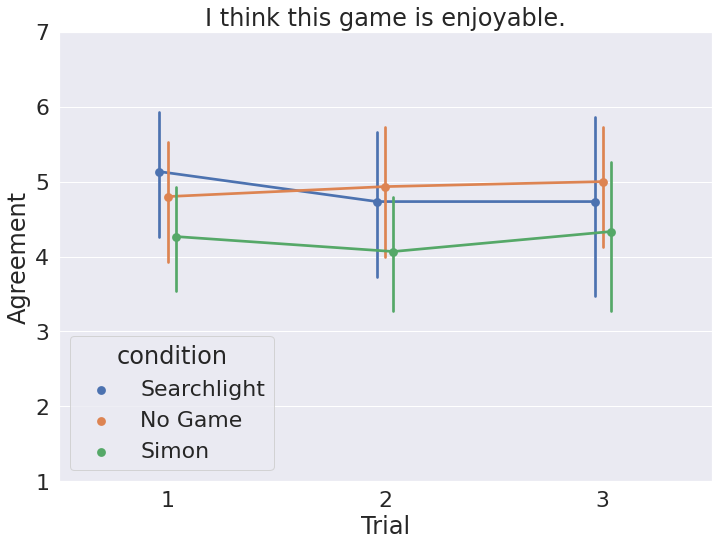

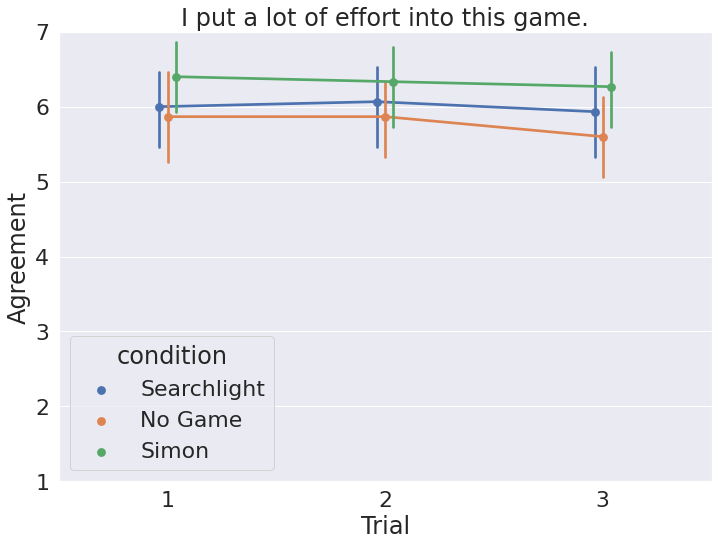

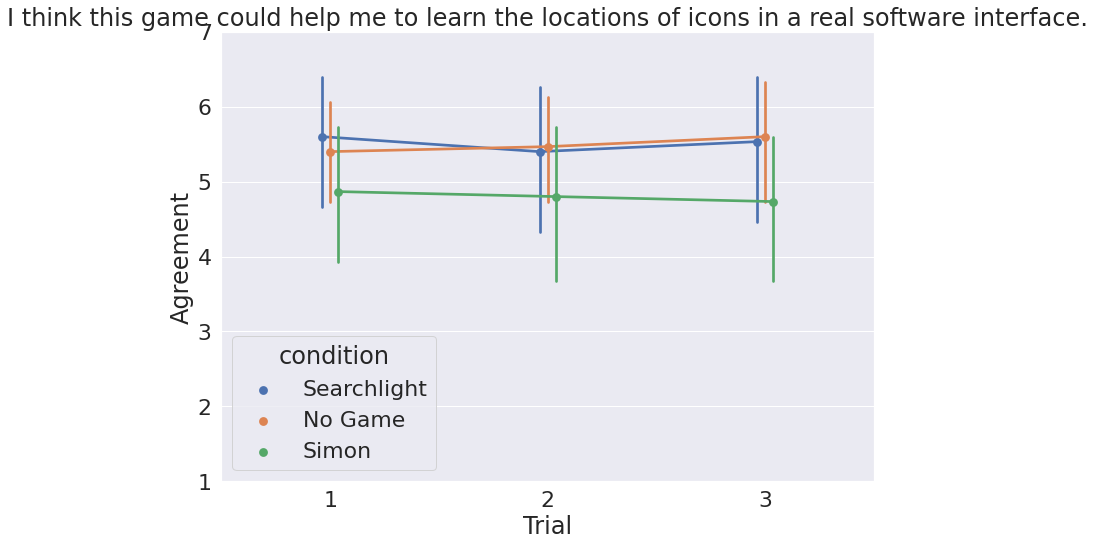

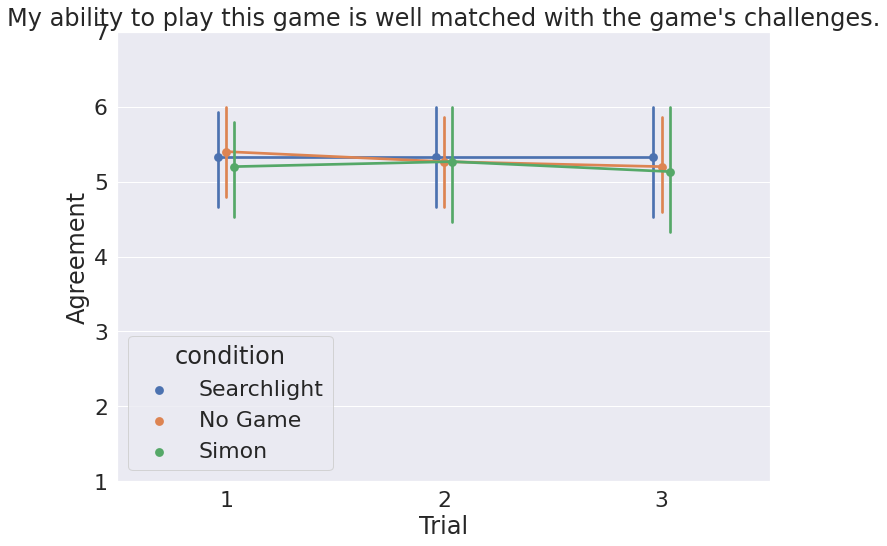

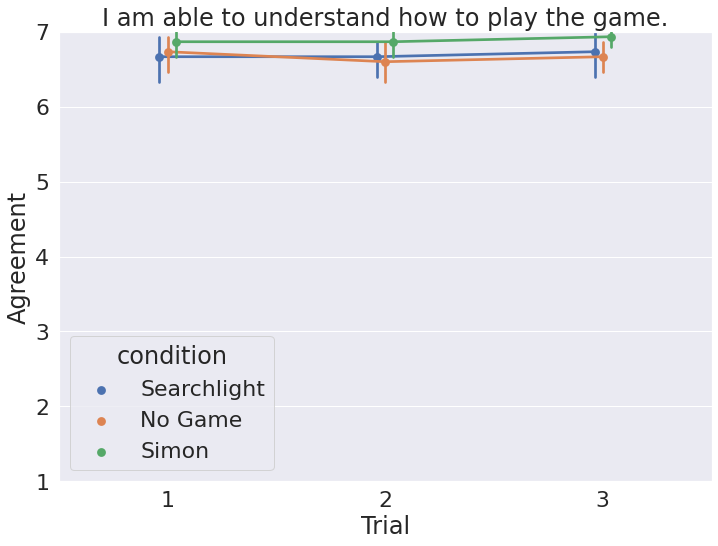

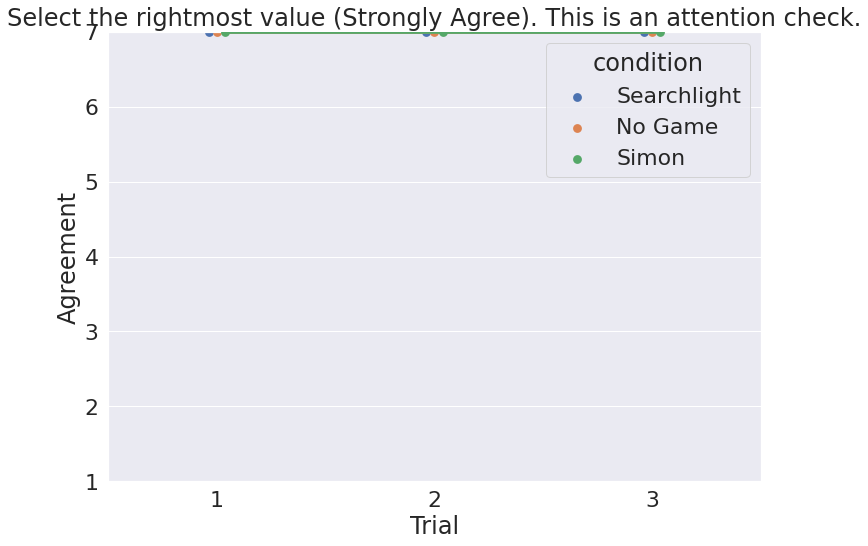

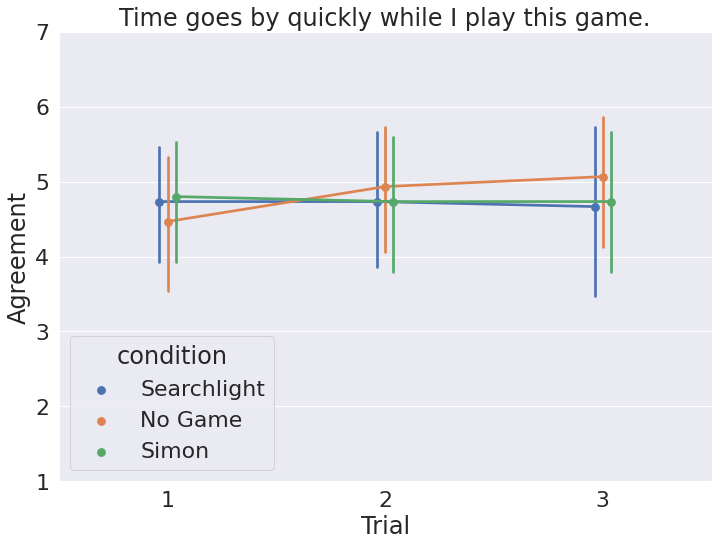

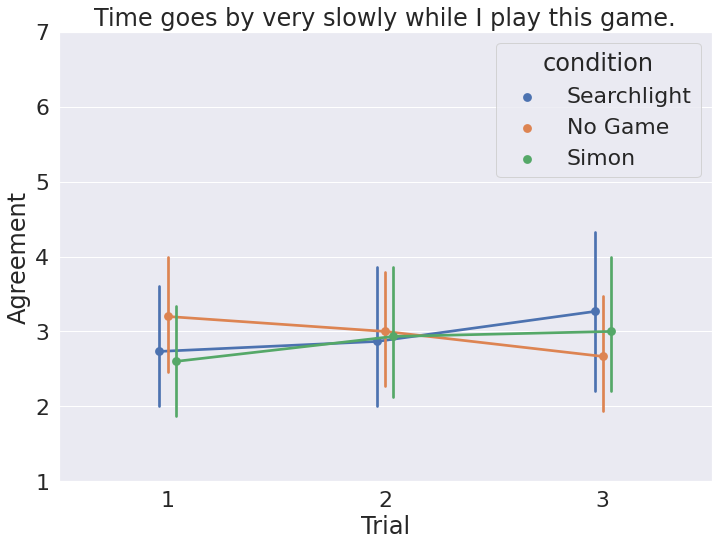

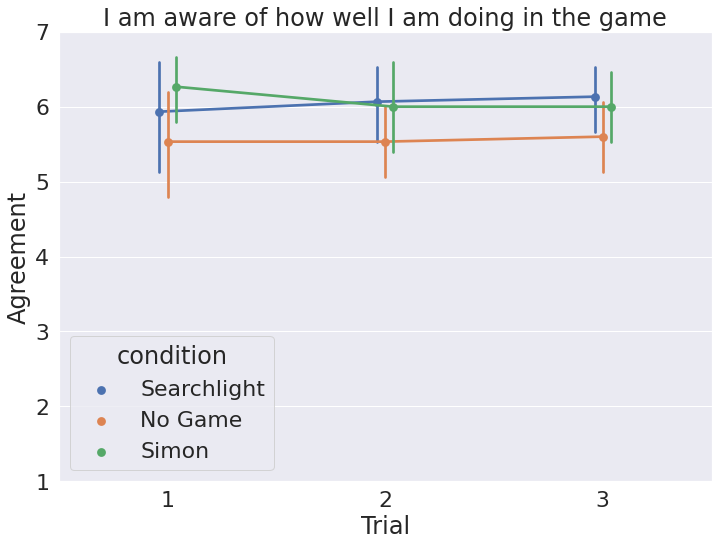

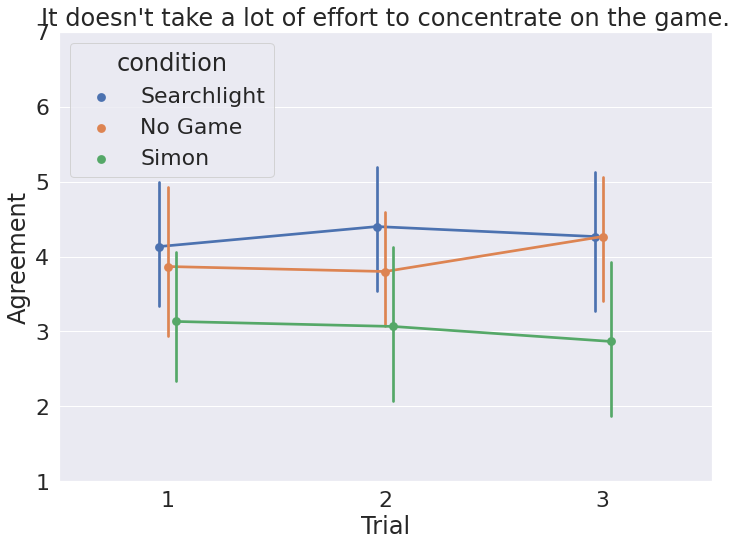

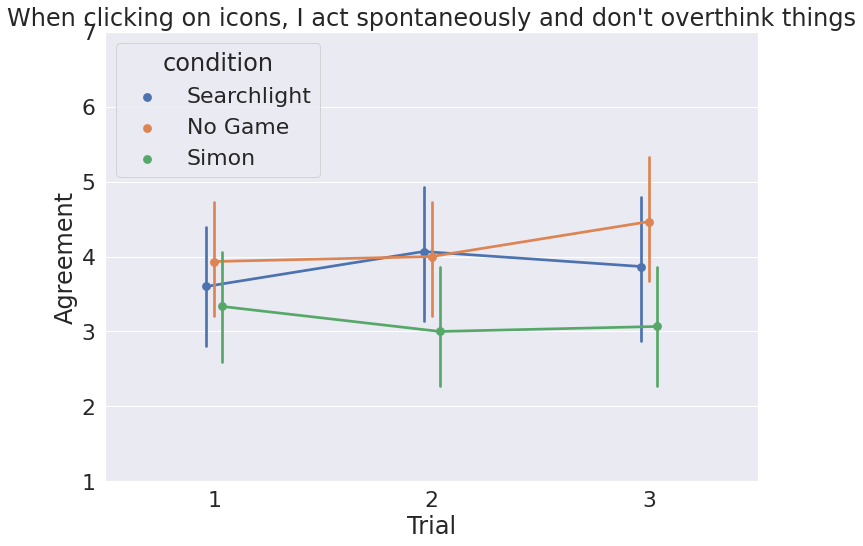

In [135]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/")

for likert_data in FSS_SURVEY_STATEMENTS:
    plt.figure()
    plt.ylim(1, 7)
    sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, errorbar=('ci', 95)).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Trial", ylabel="Agreement")
    plt.savefig(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/{likert_data}.png")

<h2>Trial Data</h2>

In [136]:

if not os.path.exists(f"./plots/{FOLDER_NAME}/trial_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/trial_data/")

In [137]:
simon_trial_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'training']
simon_trial_data = simon_trial_data_filtered.sort_values(['participantID', 'timeSubmitted'])
# simon_trial_data['trial_order'] = simon_trial_data.groupby('participantID').cumcount() + 1
simon_trial_data['trial_order'] = simon_trial_data_filtered['gameDistributionIndex'] + 1



In [138]:
simon_trial_data.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog', 'ctForTargetInOrder', 'targetErrorArray',
       'errorInTrial', 'treatment', 'trial_order'],
      dtype='object')

In [139]:
searchlight_trial_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'training']
searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['manhattan']==0]
searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['errors']==0]
searchlight_successful_trials = searchlight_successful_trials.sort_values(['participantID', 'timeSubmitted'])
searchlight_successful_trials['trial_order'] = searchlight_successful_trials.groupby('participantID').cumcount() + 1
searchlight_successful_trials['block_order'] = searchlight_successful_trials['trial_order'].apply(lambda x: (x - 1) // 6 + 1)

no_game_trial_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'training']
no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['manhattan']==0]
no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['errors']==0]
no_game_successful_trials = no_game_successful_trials.sort_values(['participantID', 'timeSubmitted'])
no_game_successful_trials['trial_order'] = no_game_successful_trials.groupby('participantID').cumcount() + 1
no_game_successful_trials['block_order'] = no_game_successful_trials['trial_order'].apply(lambda x: (x - 1) // 6 + 1)

In [140]:
simon_trial_data['targetErrorArray'].to_csv(f"./plots/{FOLDER_NAME}/trial_data/simon_target_error_arrays.csv")

In [141]:
import json
trials_time_per_target = []

def get_target_id_from_simon_sequence(row):
    if row['treatment'] == 'simon':
        if int(row['errorInTrial']) == 0:
            sequence_list = row['sequence'].split(',')
            ct_list = row['ctForTargetInOrder'].split(',')
            # FIXME: move to function, also this was a terrible way to save the errors! 
            error_array = []
            if row['targetErrorArray'] is not None and row['targetErrorArray'] != '-1':
                try:
                    error_array_str = row['targetErrorArray'].split('},{')
                    for i, item in enumerate(error_array_str):
                        if i == 0:
                            item = item + '}'
                        elif i == len(error_array_str) - 1:
                            item = '{' + item
                        else:
                            item = '{' + item + '}'
                        error_array.append(json.loads(item))
                except:
                    pass
            for i in range(0, len(sequence_list)):
                # if error_array[i]["correct"] ==1 and error_array[i]["num_errors"] ==0:
                if error_array[i]["num_errors"] ==0:
                    trials_time_per_target.append({
                        'condition': 'simon',
                        'targetID': int(sequence_list[i]),
                        'ct': float(ct_list[i]),
                        'trial': int(row['trial']),  
                        'block': int(row['gameDistributionIndex'] + 1),
                        'trial_order': int(row['trial_order']),
                        'participantID': int(row['participantID']), 
                        'timeSubmitted': row['timeSubmitted'],
                        'locationInSequence': (i + 1),
                        'distanceFromEndOfSequence': int(len(sequence_list) - (i+1)),
                        'sequence' : row['sequence'],
                        'exposure_count': simon_exposures_counter(len(sequence_list), sequence_list[i], int(row['gameDistributionIndex']))
                    })
    else:
            trials_time_per_target.append({
                'condition': row['treatment'],
                'targetID': row['targetID'],
                'ct': row['ct'],
                'block': int(row['block_order']), 
                'timeSubmitted': row['timeSubmitted']
            })
    return row

In [142]:
trial_data = pd.concat([searchlight_successful_trials, no_game_successful_trials], ignore_index=True)
trial_data = trial_data.append(simon_trial_data, ignore_index=True)

trial_data.apply(lambda row: get_target_id_from_simon_sequence(row), axis=1)

targets_time_per_click = pd.DataFrame(trials_time_per_target)    

# targets_time_per_click = targets_time_per_click[~((targets_time_per_click['condition'] == 'simon') & (targets_time_per_click['exposure_count'] > 15))]


/tmp/ipykernel_19692/4048907440.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial_data = trial_data.append(simon_trial_data, ignore_index=True)


In [143]:
check_9 = targets_time_per_click[(targets_time_per_click['condition'] == 'simon') & (targets_time_per_click['targetID'] == 105) & (targets_time_per_click['exposure_count'] < 10) & (targets_time_per_click['exposure_count'] > 7)]

check_9

,condition,targetID,ct,block,timeSubmitted,trial,trial_order,participantID,locationInSequence,distanceFromEndOfSequence,sequence,exposure_count
3260,simon,105,1.1992,3,2026-01-29 03:37:17.986204,4.0,3.0,3.0,6.0,0.0,"16,14,138,71,81,105",8.0
3331,simon,105,2.3662,3,2026-01-29 03:41:13.519514,4.0,3.0,4.0,6.0,0.0,"16,14,138,71,81,105",8.0
3419,simon,105,2.0580,3,2026-01-29 03:51:51.986885,4.0,3.0,6.0,6.0,0.0,"16,14,138,71,81,105",8.0
3498,simon,105,1.7174,3,2026-01-29 03:47:10.395442,4.0,3.0,7.0,6.0,0.0,"16,14,138,71,81,105",8.0
3575,simon,105,5.5160,3,2026-01-29 04:04:44.126697,4.0,3.0,9.0,6.0,0.0,"16,14,138,71,81,105",8.0
3576,simon,105,4.0525,4,2026-01-29 04:05:09.889375,5.0,4.0,9.0,1.0,2.0,"105,81,71",9.0
3654,simon,105,1.0397,3,2026-01-29 03:48:37.009242,4.0,3.0,10.0,6.0,0.0,"16,14,138,71,81,105",8.0
3835,simon,105,2.9160,3,2026-01-29 04:00:08.457264,4.0,3.0,13.0,6.0,0.0,"16,14,138,71,81,105",8.0
3836,simon,105,2.9767,4,2026-01-29 04:00:53.006330,5.0,4.0,13.0,1.0,2.0,"105,81,71",9.0
3910,simon,105,0.9470,3,2026-01-29 03:54:01.680229,4.0,3.0,14.0,6.0,0.0,"16,14,138,71,81,105",8.0


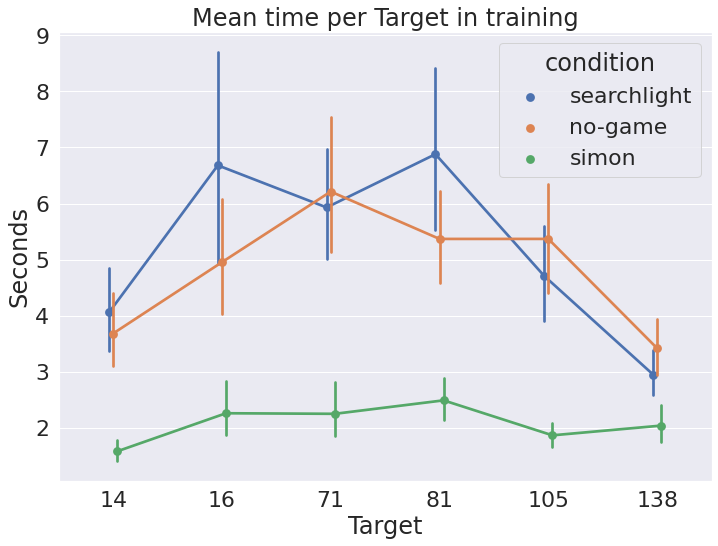

In [144]:



plt.figure()
sns.pointplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title="Mean time per Target in training", xlabel="Target", ylabel="Seconds")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target.png")

In [145]:
targets = targets_time_per_click['targetID'].unique()

targets_time_per_click.to_csv(f"./plots/{FOLDER_NAME}/trial_data/targets_time_per_click.csv")

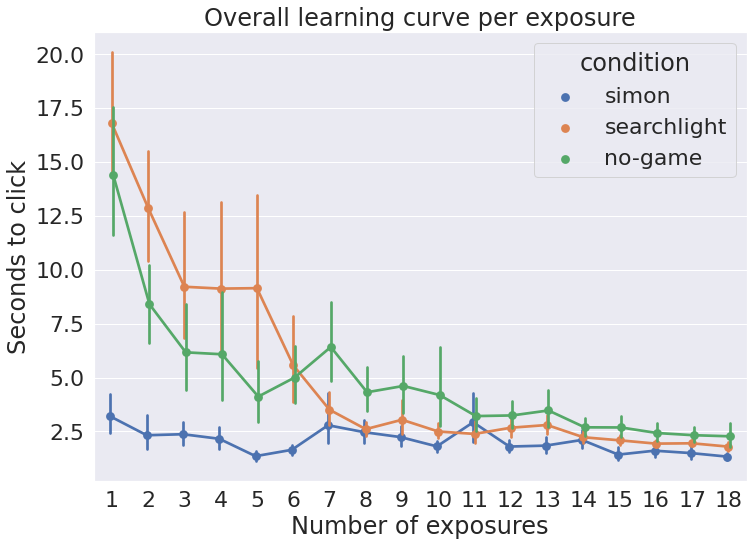

In [146]:

learning_curve = targets_time_per_click.sort_values(['participantID', 'timeSubmitted'])
learning_curve['target_order'] = learning_curve.apply(lambda row: int(row['exposure_count']) if row['condition']=='simon' else int(row['block']), axis=1)
plt.figure()
sns.pointplot(data=learning_curve, x='target_order', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Overall learning curve per exposure", xlabel="Number of exposures", ylabel="Seconds to click")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/learning_curve_all_targets.png")

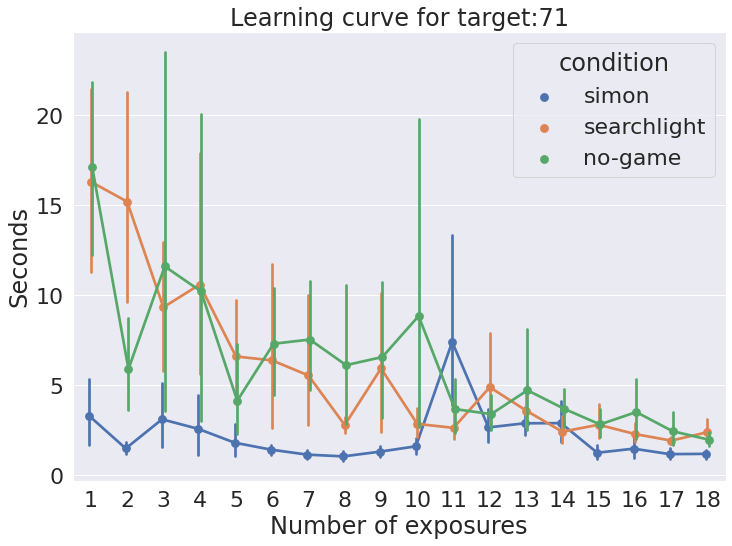

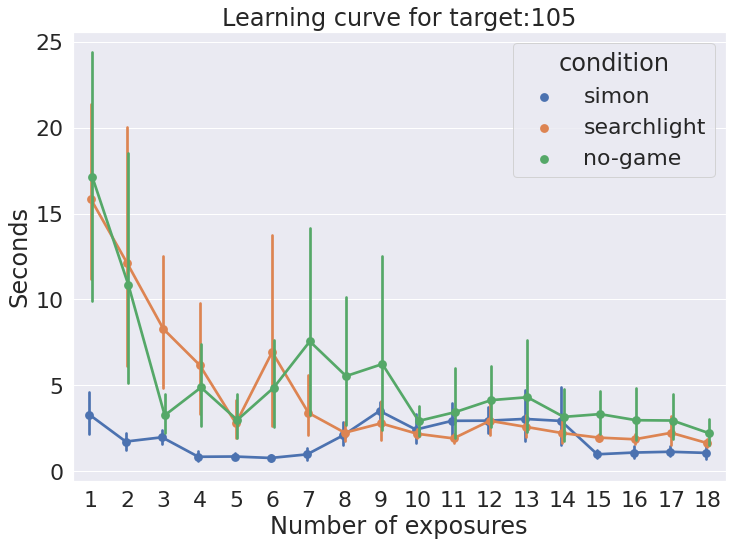

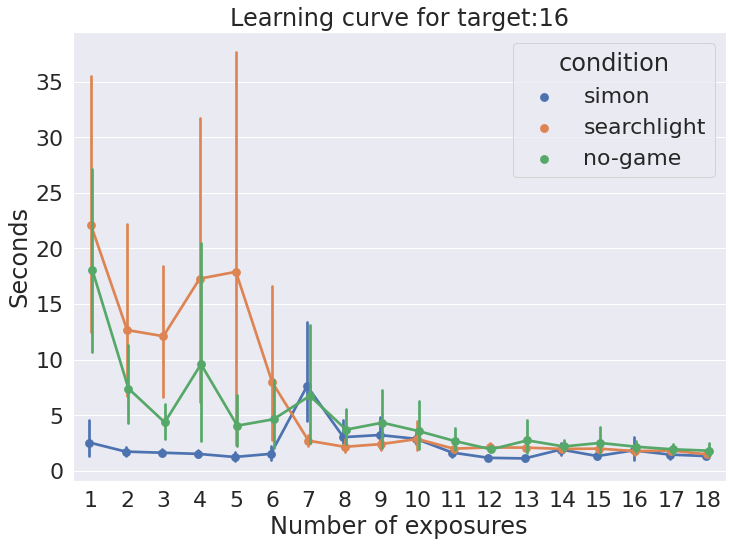

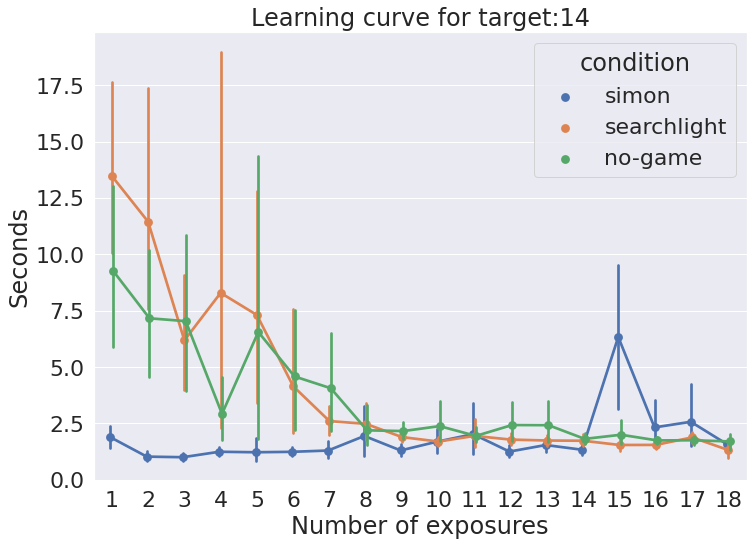

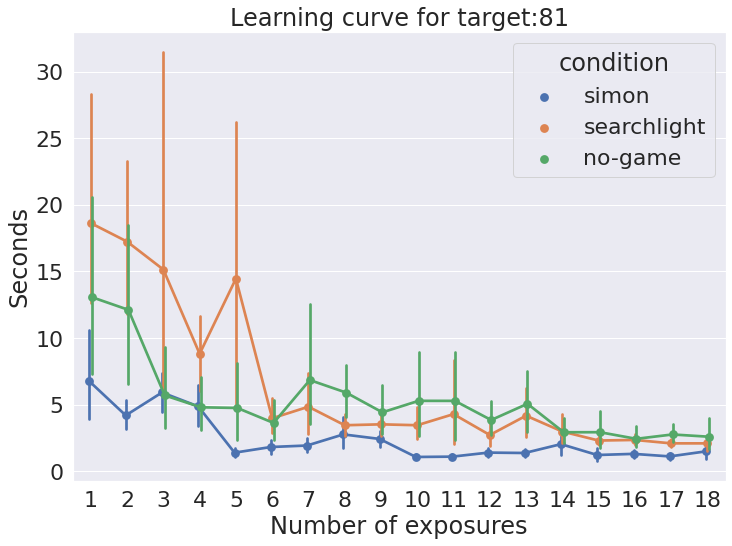

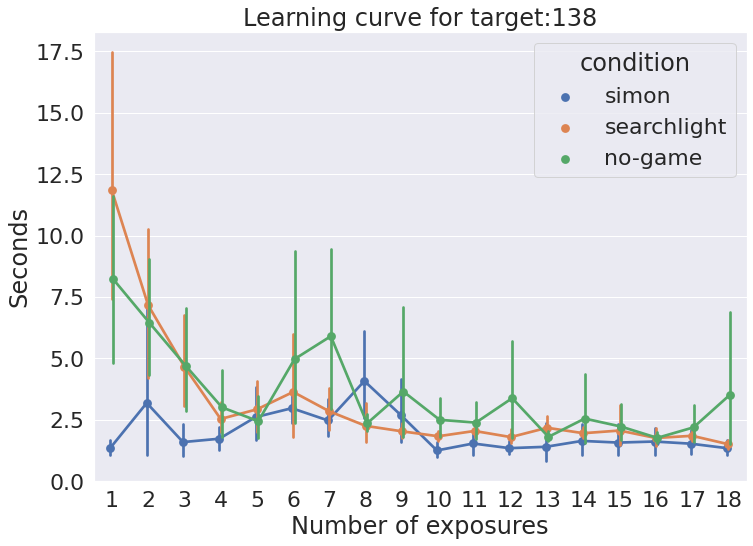

In [147]:
targets = targets_time_per_click['targetID'].unique()

targets_time_per_click.to_csv(f"./plots/{FOLDER_NAME}/trial_data/targets_time_per_click.csv")

for target in targets:
    target_data = targets_time_per_click[targets_time_per_click['targetID'] == target]
    target_data_ordered = target_data.sort_values(['participantID', 'timeSubmitted'])
    target_data_ordered['target_order'] = target_data_ordered.apply(lambda row: int(row['exposure_count']) if row['condition']=='simon' else int(row['block']), axis=1)
    plt.figure()
    sns.pointplot(data=target_data_ordered, x='target_order', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Learning curve for target:{target}", xlabel="Number of exposures", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target_{str(target)}.png")

<h2>Time to click based on placement in the sequence</h2>

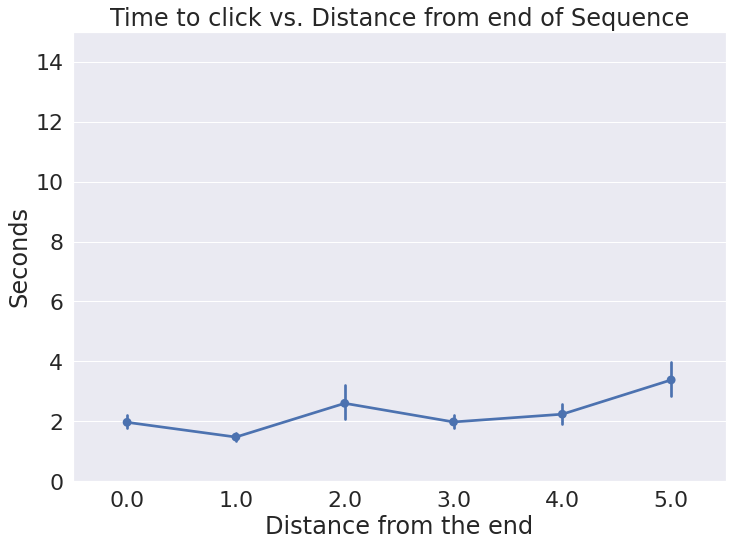

In [148]:
targets_time_per_click.dropna(inplace=True)
#sequence_locations = targets_time_per_click['locationInSequence'].unique()
#sequence_locations = sorted(sequence_locations)

targets_time_per_click['trial_order'] = targets_time_per_click['trial_order'].astype(int)

plt.figure()
sns.pointplot(data=targets_time_per_click, x='distanceFromEndOfSequence', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Time to click vs. Distance from end of Sequence", xlabel="Distance from the end", ylabel="Seconds")
plt.ylim(0, 15)
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/time_v_distance_from_end_of_sequence.png")


# for n in sequence_locations:
#     location_data = targets_time_per_click[(targets_time_per_click['locationInSequence'] == n) & (targets_time_per_click['condition']=='simon')]
#     plt.figure()
#     sns.pointplot(data=location_data, x='block', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Distance in sequence from the end: {n}", xlabel="Trial", ylabel="Seconds")
#     plt.ylim(0, 15)
#     plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/distance_from_end_of_sequence_{n}.png")

<h2>Memory Test Analysis</h2>

In [149]:
searchlight_test_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'testing']
searchlight_test_data_ordered = searchlight_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
searchlight_test_data_ordered['test_order'] = searchlight_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_test_data_ordered['breakpoint'] = searchlight_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1) # seven because of attention checks.
searchlight_test_data_ordered['condition'] = 'Searchlight'


no_game_test_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'testing']
no_game_test_data_ordered = no_game_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
no_game_test_data_ordered['test_order'] = no_game_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_test_data_ordered['breakpoint'] = no_game_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
no_game_test_data_ordered['condition'] = 'No Game'

simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_ordered = simon_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
simon_test_data_ordered['test_order'] = simon_test_data_ordered.groupby('participantID').cumcount() + 1
simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['breakpoint'].apply(lambda x: x-3 if x>3 else x)
simon_test_data_ordered['condition'] = 'Simon'


test_data = pd.concat([searchlight_test_data_ordered, no_game_test_data_ordered, simon_test_data_ordered], ignore_index=True)

In [150]:
ATTENTION_CHECK_IDS = [4, 8]
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]

In [151]:

test_data = test_data[test_data['targetID'] != 0].reset_index(drop=True)
test_data['targetID'].unique()

array([105,  81, 138,  14,  71,  16])

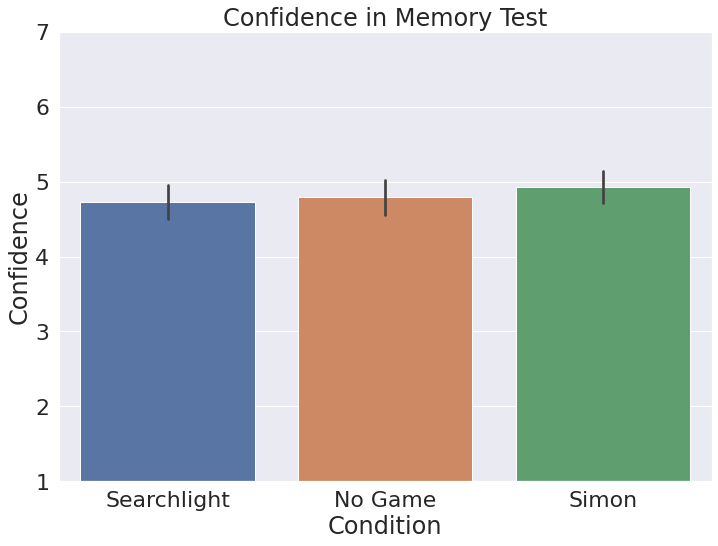

In [152]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/test_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/test_data/")

confidence = test_data[test_data['confidence']>0]

confidence = confidence[~confidence["test_order"].isin(ATTENTION_CHECK_IDS)]
# graph the mean engagement per trial order 
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'confidence', ci=95).set(title="Confidence in Memory Test", xlabel="Condition", ylabel="Confidence")
#sns.pointplot(data=confidence , x='test_order', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Reported confidence in selection", xlabel="Trial", ylabel="Reported Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence.png")

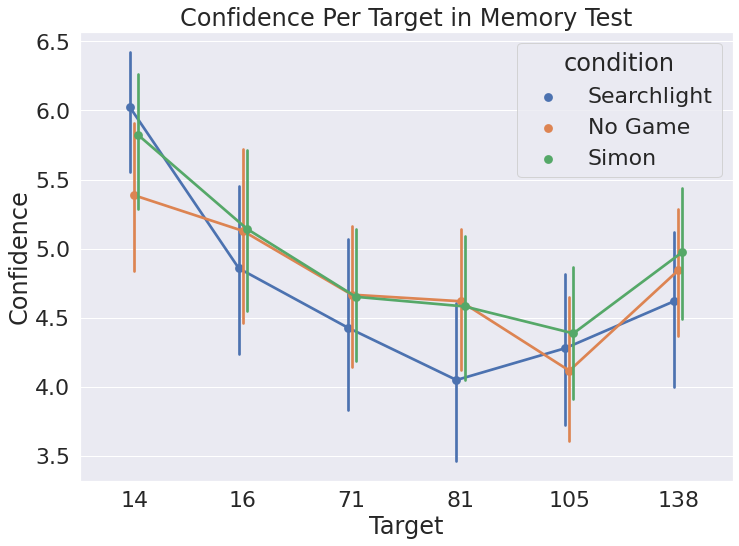

In [153]:
# confidence per target in memory test 
plt.figure()
sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_target.png")

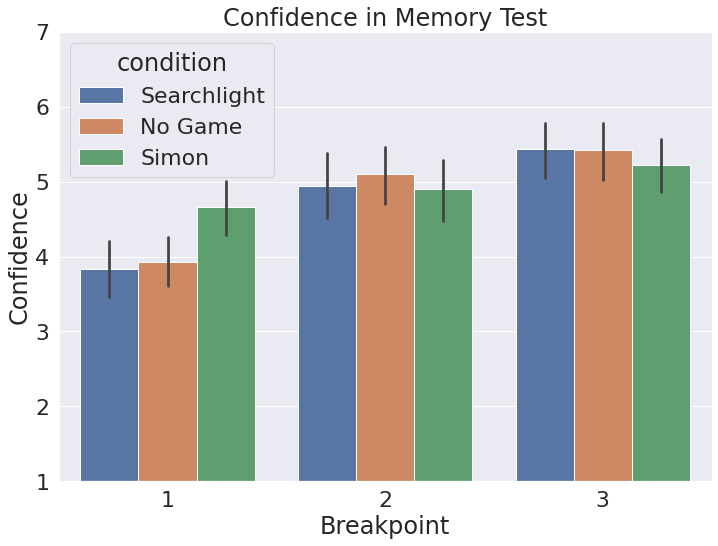

In [154]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'confidence', hue="condition", ci=95).set(title="Confidence in Memory Test", xlabel="Breakpoint", ylabel="Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_breakpoint.png")

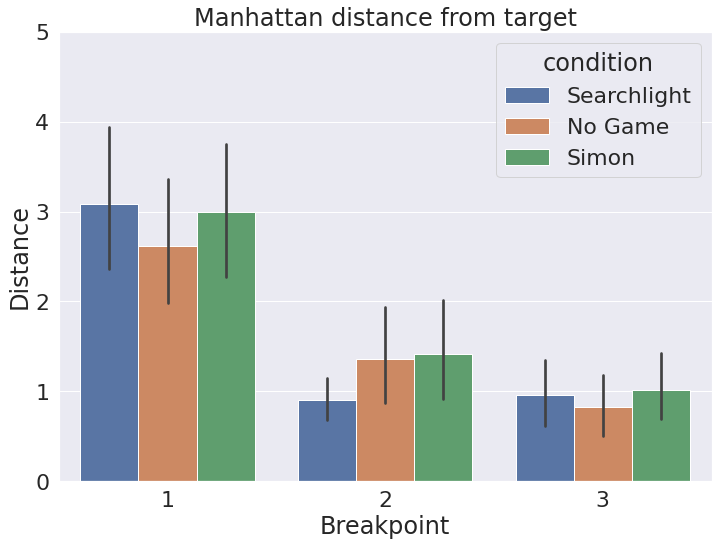

In [155]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95).set(title="Manhattan distance from target", xlabel="Breakpoint", ylabel="Distance")
plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_per_breakpoint.png")

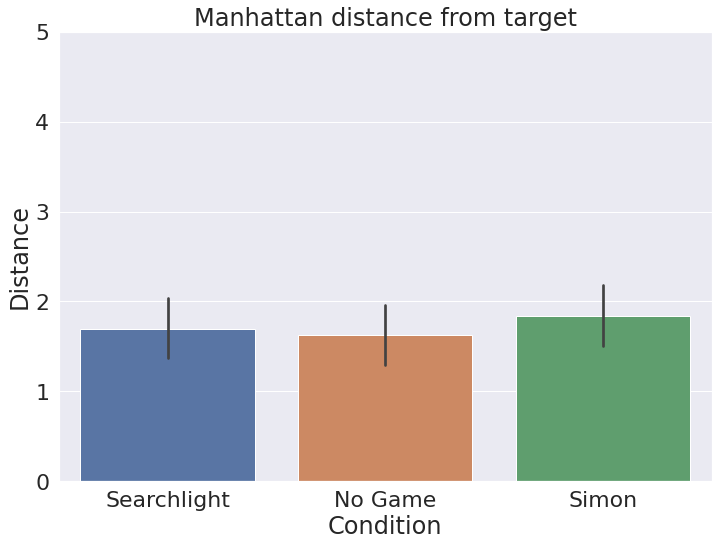

In [156]:
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'manhattan', ci=95).set(title="Manhattan distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_test_performance.png")

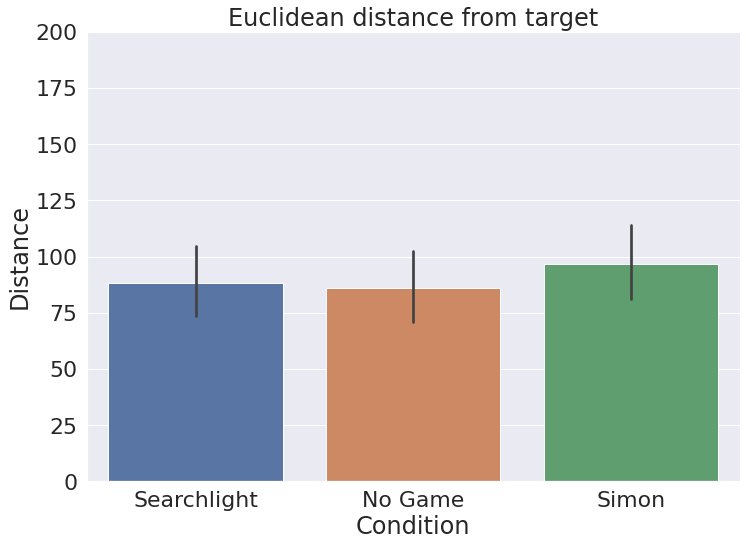

In [157]:

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'euclidean', ci=95).set(title="Euclidean distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 200)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_test_performance.png")

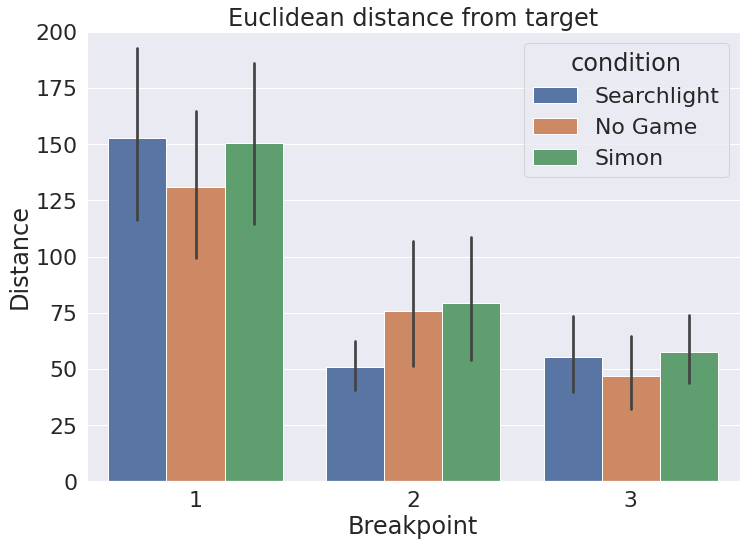

In [158]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95).set(title="Euclidean distance from target", xlabel="Breakpoint", ylabel="Distance")
plt.ylim(0, 200)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_per_breakpoint.png")

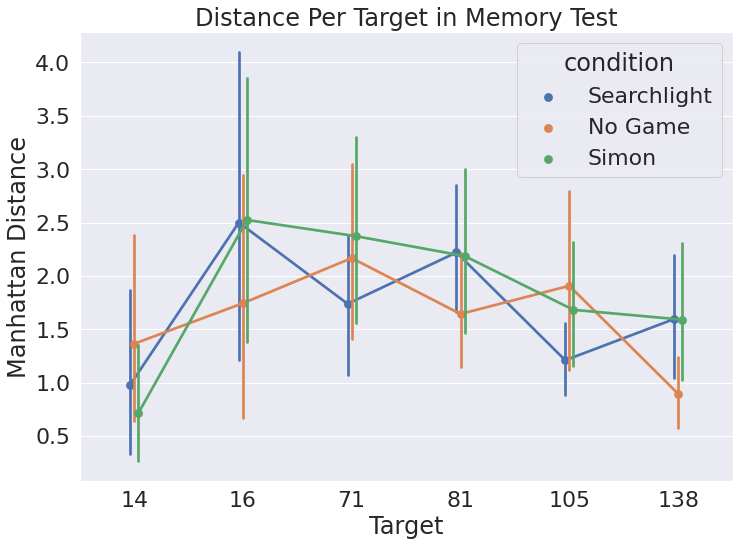

In [159]:
plt.figure()
sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95)).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target.png")

<h2>Sequence Test Analysis</h2>

In [160]:
simon_sequence_test_data = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase']=="sequence_testing"]
simon_sequence_test_data_ordered = simon_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
simon_sequence_test_data_ordered['sequence_test_order_by_participant'] = simon_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
simon_sequence_test_data_ordered['sequence_test_order'] = simon_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
simon_sequence_test_data_ordered['condition'] = 'simon'

no_game_sequence_test_data = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase']=="sequence_testing"]
no_game_sequence_test_data_ordered = no_game_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
no_game_sequence_test_data_ordered['sequence_test_order_by_participant'] = no_game_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_sequence_test_data_ordered['sequence_test_order'] = no_game_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
no_game_sequence_test_data_ordered['condition'] = 'no-game'

searchlight_sequence_test_data = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase']=="sequence_testing"]
searchlight_sequence_test_data_ordered = searchlight_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'] = searchlight_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_sequence_test_data_ordered['sequence_test_order'] = searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
searchlight_sequence_test_data_ordered['condition'] = 'searchlight' 

In [161]:
simon_sequence_test_data.head()

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,errorObjects,cumulativeManhattanDistance,cumulativeEuclideanDistance,sequence,manhattanDistanceLog,euclideanDistanceLog,ctForTargetInOrder,targetErrorArray,errorInTrial,treatment
47,48,3,2026-01-29 03:35:53.787506,3,NO_GUIDE,697abb05ac7e8c070f86596f,1,sequence_testing,1,1,...,,9,387.185232,"81,138,16,105,71,14","2,2,1,3,1,0","95.42536350467836,59.81638571495273,41.7731971...",,,0,simon
48,49,2,2026-01-29 03:36:00.865029,2,NO_GUIDE,6717f0ac88d9f27d9b79af31,1,sequence_testing,1,1,...,,13,691.693147,"81,138,16,105,71,14","2,2,0,2,5,2","95.01578816175763,94.76286192385707,13.9283882...",,,0,simon
50,51,2,2026-01-29 03:36:17.126140,2,NO_GUIDE,6717f0ac88d9f27d9b79af31,1,sequence_testing,1,2,...,,11,563.854732,"138,105,14,81,16,71","2,0,1,2,1,5","100.44899203078147,8.94427190999916,68.0294054...",,,0,simon
51,52,3,2026-01-29 03:36:17.421231,3,NO_GUIDE,697abb05ac7e8c070f86596f,1,sequence_testing,1,2,...,,8,379.353555,"138,105,14,81,16,71","2,2,0,3,1,0","81.83520025025906,73.87827826905551,21.4009345...",,,0,simon
93,94,4,2026-01-29 03:39:36.818475,4,NO_GUIDE,591d369e88bbb500013a8517,1,sequence_testing,1,1,...,,1,124.035467,"81,138,16,105,71,14","1,0,0,0,0,0","62.64982043070834,14.560219778561038,8.0622577...",,,0,simon


In [162]:
sequence_data_remapped = []

def save_to_sequence_data_remapped(row):
    sequence_list = row['sequence'].split(',')
    manhattan_distance_list = row['manhattanDistanceLog'].split(',')
    euclidean_distance_list = row['euclideanDistanceLog'].split(',')
    for i in range(0, len(sequence_list)):
        sequence_data_remapped.append({
            'condition': row['treatment'],
            'sequence': row['sequence'], # FIXME: these should all be in the same order between pilots, and we could check   
            'targetID': str(sequence_list[i]),
            'participantID': int(row['participantID']),
            'timeSubmitted': row['timeSubmitted'],
            'locationInSequence': (i + 1),
            'manhattanDistance': int(manhattan_distance_list[i]),
            'euclideanDistance': float(euclidean_distance_list[i]),
        })
    return row

In [163]:
sequence_test_data = pd.concat([searchlight_sequence_test_data_ordered, no_game_sequence_test_data_ordered, simon_sequence_test_data_ordered], ignore_index=True)
sequence_test_data.apply(lambda row: save_to_sequence_data_remapped(row), axis=1)

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,manhattanDistanceLog,euclideanDistanceLog,treatment,sequence_test_order_by_participant,sequence_test_order,gameDistributionIndex,cursorWidth,ctForTargetInOrder,targetErrorArray,errorInTrial
0,440,2,2026-01-29 01:54:59.806911,2,searchlight,602b4083b123902838efd51f,1,sequence_testing,1,1,...,"10,15,9,6,7,4","430.0151160133792,629.8864977120878,483.182160...",searchlight,1,1,NaN,NaN,NaN,NaN,NaN
1,455,2,2026-01-29 01:55:13.367323,2,searchlight,602b4083b123902838efd51f,1,sequence_testing,1,2,...,"14,10,7,12,10,8","610.0204914590985,452.4179483619102,450.400932...",searchlight,2,1,NaN,NaN,NaN,NaN,NaN
2,656,2,2026-01-29 02:00:17.451806,2,searchlight,602b4083b123902838efd51f,1,sequence_testing,7,1,...,"5,9,11,5,14,8","254.1830049393547,557.8073144016669,545.389768...",searchlight,3,2,NaN,NaN,NaN,NaN,NaN
3,661,2,2026-01-29 02:00:23.830493,2,searchlight,602b4083b123902838efd51f,1,sequence_testing,7,2,...,"11,9,6,11,5,12","489.49463735571203,423.38752933925673,280.3212...",searchlight,4,2,NaN,NaN,NaN,NaN,NaN
4,876,2,2026-01-29 02:04:28.438525,2,searchlight,602b4083b123902838efd51f,1,sequence_testing,13,1,...,"5,7,9,10,8,8","255.40947515705054,392.65761166695853,405.7647...",searchlight,5,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,910,23,2026-01-29 05:01:53.683452,23,simon,65de3af8fcbc6ef9331bd863,1,sequence_testing,1,2,...,"14,10,7,12,10,7","613.2087735836792,434.7159992454844,442.136856...",simon,2,1,0.0,75.0,,,0.0
264,926,23,2026-01-29 05:06:49.409610,23,simon,65de3af8fcbc6ef9331bd863,1,sequence_testing,1,1,...,"1,0,3,0,2,2","54,19.026297590440446,135.83077707206124,14.42...",simon,3,2,2.0,75.0,,,0.0
265,927,23,2026-01-29 05:07:09.034271,23,simon,65de3af8fcbc6ef9331bd863,1,sequence_testing,1,2,...,"2,4,1,1,1,2","102.1224754889931,184.39088914585776,64.938432...",simon,4,2,2.0,75.0,,,0.0
266,943,23,2026-01-29 05:11:31.527432,23,simon,65de3af8fcbc6ef9331bd863,1,sequence_testing,1,1,...,"4,2,3,0,3,0","233.2595121318743,110,182.61708572858126,13.41...",simon,5,3,4.0,75.0,,,0.0


In [164]:


def getMeanManhattanDistanceFromString(s: str)-> int:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=int(substring)
    return total/len(split_s)


def getMeanEuclideanDistanceFromString(s: str)-> float:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=float(substring)
    return total/len(split_s)

sequence_test_data['mean_manhattan_distance_per_target'] = sequence_test_data['manhattanDistanceLog'].apply(lambda x: getMeanManhattanDistanceFromString(x))
sequence_test_data['mean_euclidean_distance_per_target'] = sequence_test_data['euclideanDistanceLog'].apply(lambda x: getMeanEuclideanDistanceFromString(x))


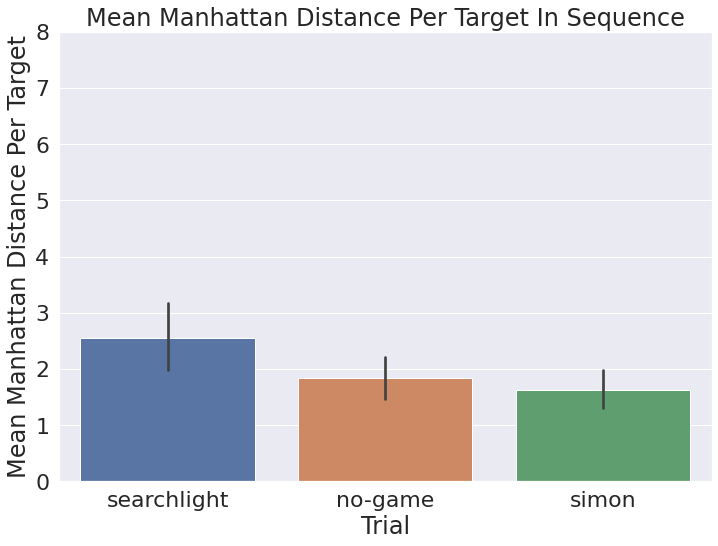

In [165]:
plt.figure()
sns.barplot(data=sequence_test_data, x='condition', y=f'mean_manhattan_distance_per_target', ci=95).set(title="Mean Manhattan Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Manhattan Distance Per Target")
plt.ylim(0,8)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_mean_manhattan_distance_per_targets.png")

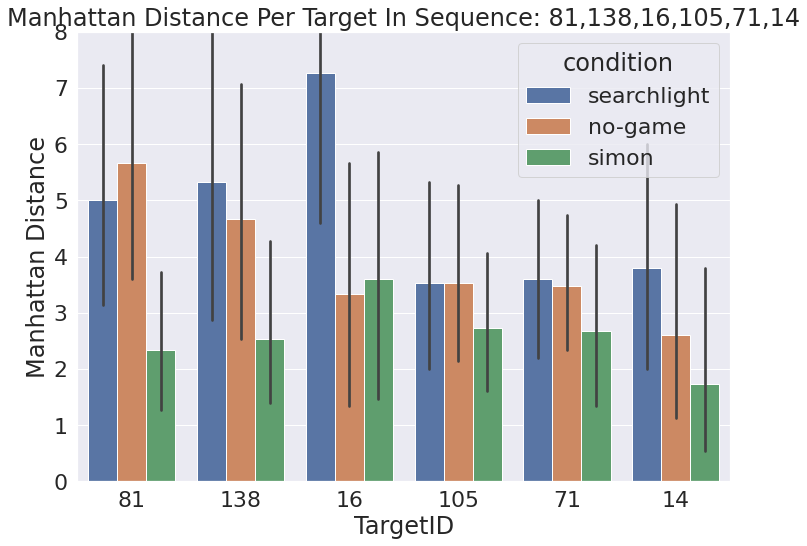

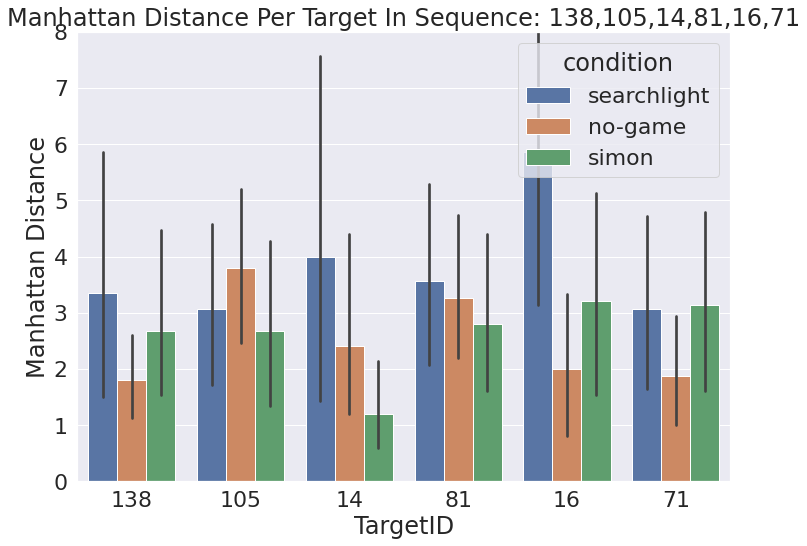

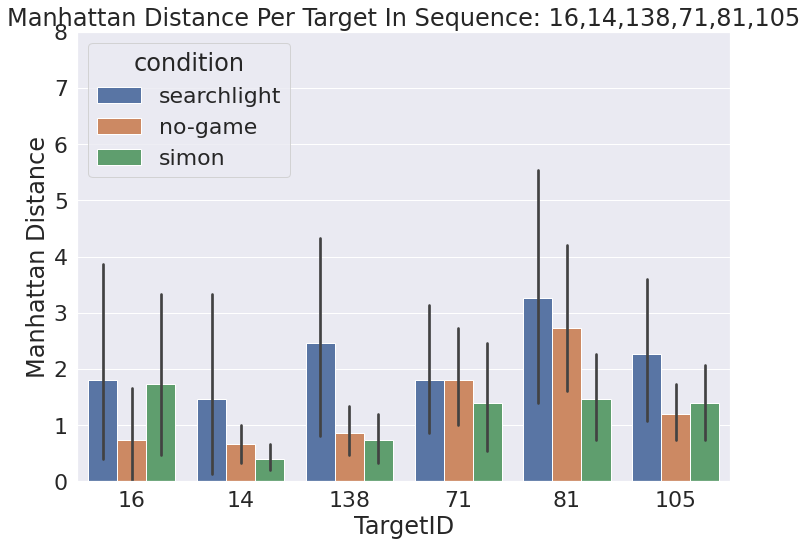

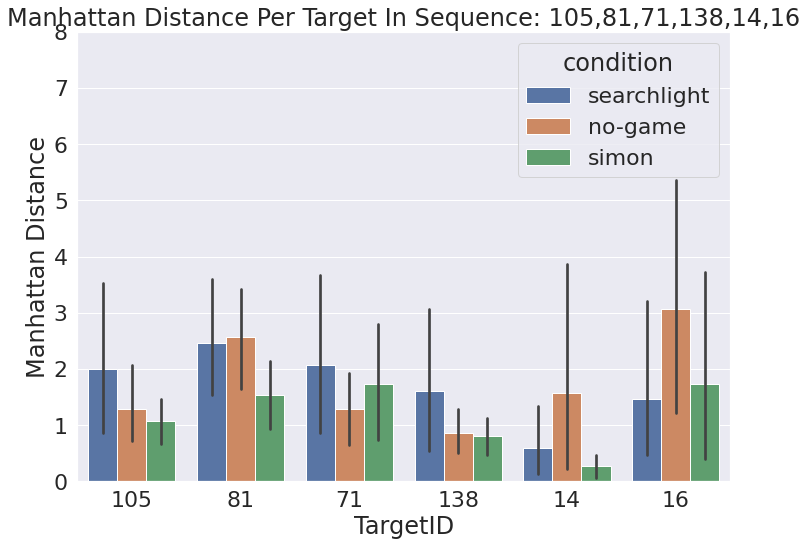

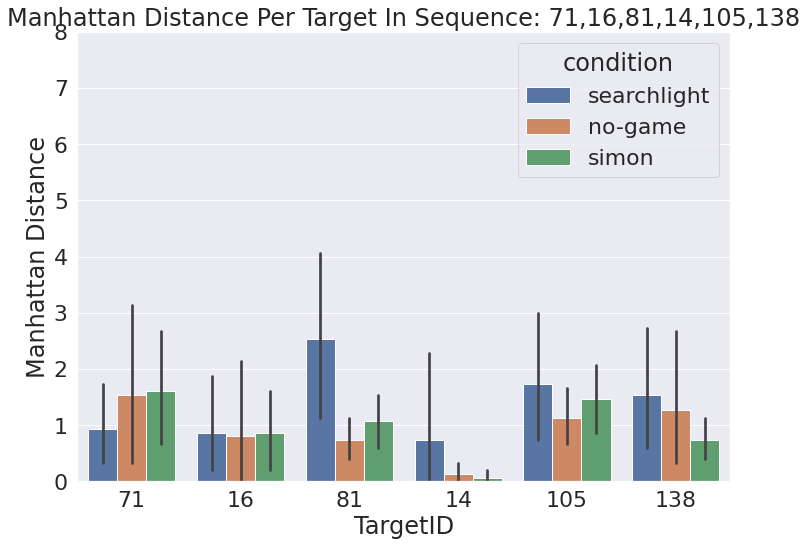

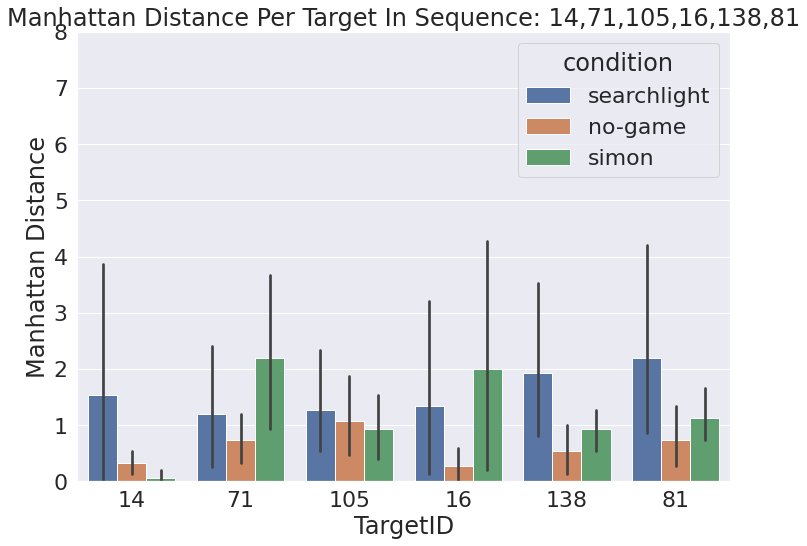

In [166]:
test_sequences = sequence_test_data['sequence'].unique()

sequence_data_remapped = pd.DataFrame(sequence_data_remapped)   

for sequence in test_sequences:
    sequence_data = sequence_data_remapped[sequence_data_remapped['sequence'] == sequence]
    plt.figure()
    sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95).set(title=f"Manhattan Distance Per Target In Sequence: {sequence}", xlabel="TargetID", ylabel="Manhattan Distance")
    plt.ylim(0,8)
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_per_targets_sequence_{sequence}.png")